# Algorytm mrówkowy
analiza

In [1]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from IPython.display import display

In [5]:
def AnalyseACO(plot_name, files, expected_results, iterations=500,
               numberOfAnts=10, collectiveMemoryPower = 1, greedyChoicePower=3,
               evaporationRate=0.5, pheromoneStartValue=1, drawPlot = True):
    # SYMULOWANE WYŻARZANIE
    actual_results = []
    error = []
    
    index = 0
    for f in files:
        print("starting", f)
        
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe",
             "ANT",
             "../Debug/Data/"+f+".txt",
             str(iterations),
             str(numberOfAnts),
             str(collectiveMemoryPower),
             str(greedyChoicePower),
             str(evaporationRate),
             str(pheromoneStartValue),
             str(0)],
            stdout=subprocess.PIPE)
        
        text_result = p1.communicate()[0].strip()
        print(text_result)
        single_result = float(text_result)
        actual_results.append(single_result)
        
        index+=1
        
    errors = [(abs(expected_results[x] - actual_results[x])) / expected_results[x] * 100
                   for x in range(len(actual_results))]
    
    avgError = sum(errors) / len(errors)
    
    resultTable = pd.DataFrame(
        {'baseFile' : files,
         'actual_results': actual_results,
         'expected_results': expected_results,
         'error': errors
        })
    
    if drawPlot:
        plt.rcParams['figure.figsize'] = [20, 5]
        fig, axes = plt.subplots()

        ind = np.arange(len(expected_results))
        width = 0.4   

        plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
        plt.bar(ind + width, actual_results, width,
            label='Wartosci obliczone przez algorytm')

        plt.ylabel('Wagi scieżek')
        plt.title(plot_name)

        plt.xticks(ind + width / 2, files)
        plt.legend(loc='best')

        plt.show()
    
    print(avgError)
    
    return (resultTable, avgError)

In [3]:
files = ["TSP/data17", "TSP/data21", "TSP/data24", "TSP/data26", "TSP/data29", "TSP/data42", "TSP/data58", "TSP/data120"]
expected_results = [2085, 2707, 1272, 937, 1610, 699, 25395, 6942]

iterations_of_dependency_check = 15

starting TSP/data17
b'2158'
starting TSP/data21
b'2707'
starting TSP/data24
b'1328'
starting TSP/data26
b'955'
starting TSP/data29
b'1764'
starting TSP/data42
b'793'
starting TSP/data58
b'27026'
starting TSP/data120
b'8541'


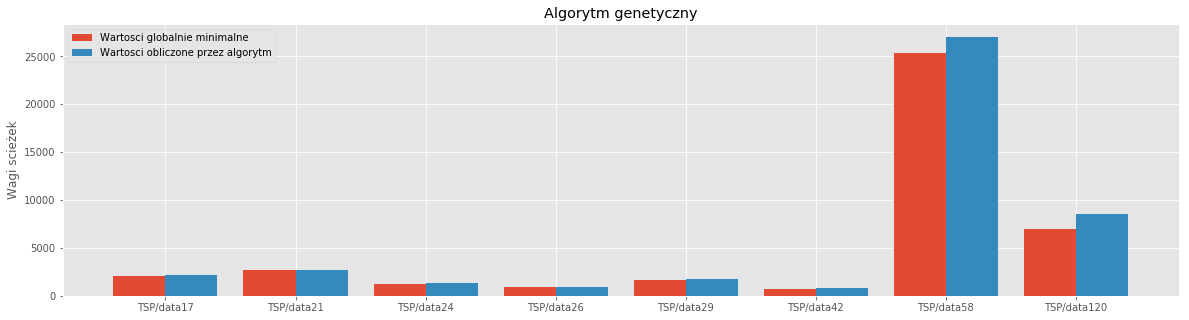

7.786746404043939


,baseFile,actual_results,expected_results,error
0,TSP/data17,2158.0,2085,3.501199
1,TSP/data21,2707.0,2707,0.000000
2,TSP/data24,1328.0,1272,4.402516
3,TSP/data26,955.0,937,1.921025
4,TSP/data29,1764.0,1610,9.565217
5,TSP/data42,793.0,699,13.447783
6,TSP/data58,27026.0,25395,6.422524
7,TSP/data120,8541.0,6942,23.033708


In [6]:
display(AnalyseACO("Algorytm genetyczny", files, expected_results)[0])